In [9]:
import pandas as pd
import numpy as np
import csv

# import data
data = pd.read_csv("C:/train_data.csv")


In [10]:
# drop empty data
data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

# drop unimportant data
data = data.drop(columns=["case_id","Hospital_code","Hospital_type_code","City_Code_Hospital",
                          "Hospital_region_code","Department","Ward_Type","Ward_Facility_Code",
                          "patientid", "City_Code_Patient","Bed Grade"])
data


,Available Extra Rooms in Hospital,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,3,Emergency,Extreme,2,51-60,4911,0-10
1,2,Trauma,Extreme,2,51-60,5954,41-50
2,2,Trauma,Extreme,2,51-60,4745,31-40
3,2,Trauma,Extreme,2,51-60,7272,41-50
4,2,Trauma,Extreme,2,51-60,5558,41-50
...,...,...,...,...,...,...,...
318433,3,Emergency,Moderate,3,41-50,4144,20-Nov
318434,2,Urgent,Moderate,4,81-90,6699,31-40
318435,3,Emergency,Minor,3,71-80,4235,20-Nov
318436,3,Trauma,Minor,5,20-Nov,3761,20-Nov


In [13]:
# define stay time over 70 days as long-term, others as short-term
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder().fit(data["Stay"])
data["Stay"] = encoder.transform(data["Stay"])


data["y"]= data.apply(lambda x: 1 if x["Stay"]>6 else 0, axis=1)


In [14]:
# define X, y
y=data['y']
X=data.drop(['Stay','y'], axis=1)
X.head()



,Available Extra Rooms in Hospital,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,3,Emergency,Extreme,2,51-60,4911
1,2,Trauma,Extreme,2,51-60,5954
2,2,Trauma,Extreme,2,51-60,4745
3,2,Trauma,Extreme,2,51-60,7272
4,2,Trauma,Extreme,2,51-60,5558


In [15]:
# split dataset
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, stratify = y, random_state=1) #stratified sampling

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')


training data has 219655 observation with 6 features
test data has 94138 observation with 6 features


In [16]:
# One hot encoding
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['Type of Admission']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])
X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

categories = ['Severity of Illness']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])
X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

categories = ['Age']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])
X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)



In [17]:
X_train.head()

# define numerical & categorical data
cat_cols = X.columns[X.dtypes == 'object']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]
num_cols


Index(['Available Extra Rooms in Hospital', 'Visitors with Patient',
       'Admission_Deposit'],
      dtype='object')

In [18]:
# standardization (x-mean)/std

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [19]:
X_train.head()

,Available Extra Rooms in Hospital,Visitors with Patient,Admission_Deposit,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate,Age_0-10,Age_20-Nov,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,0.684175,-0.728272,-0.070920,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.025679,0.406704,-1.653282,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.025679,-0.728272,0.549505,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-1.025679,-0.728272,0.104898,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.025679,-0.728272,1.800483,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
## predictive analytics
# build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [104]:
## logistic
classifier_logistic = LogisticRegression()
classifier_logistic.fit(X_train, y_train)
classifier_logistic.predict(X_test)
classifier_logistic.score(X_test, y_test)




0.9330026131848987

In [21]:
# KNN
from sklearn.model_selection import GridSearchCV
# Choose k
parameters = {
    'n_neighbors':[1,3,5]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5]})

In [26]:
# best k
from sklearn.model_selection import GridSearchCV
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))
print_grid_search_metrics(Grid_KNN)

Best score: 0.9258200359654915
Best parameters set:
n_neighbors:5


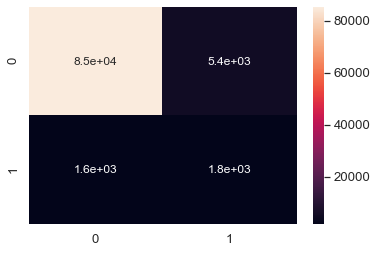

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     86903
           1       0.53      0.25      0.34      7235

    accuracy                           0.93     94138
   macro avg       0.74      0.62      0.65     94138
weighted avg       0.91      0.93      0.91     94138



0.9255667211965413

In [28]:
import pandas as pd
import numpy as np
import csv
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
def KNN(k):
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    confusion_matrix(y_pred, y_test)

    #Plot confusion matrix
    cm = confusion_matrix(y_pred, y_test)
    df_cm = pd.DataFrame(cm)
    sns.set(font_scale=1.2) # for label size
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
    plt.show()
    
    #Print classification report
    cls = classification_report(y_test, y_pred)
    print(cls)
    return score
KNN(5)

In [ ]:
# Random Forest

In [108]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [60,80,100],
    'max_depth': [1,5,10]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [60, 80, 100]})

In [ ]:
# best number of tress
print_grid_search_metrics(Grid_RF)

In [ ]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

In [ ]:
best_RF_model

In [ ]:
#Plot confusion matrix
cm = confusion_matrix(y_pred, y_test)
df_cm = pd.DataFrame(cm)
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()
    
#Print classification report
cls = classification_report(y_test, best_KNN_model.predict(X_test))
print(cls)